In [1]:
import random as rand
import matplotlib.pyplot as plt 
import numpy as np
random.seed(50)
np.random.seed(50)

def initialize_position():
    cords_set = set()
    while len(cords_set) < 10: 
        x, y = rand.randint(0, 100), rand.randint(0, 100)
        cords_set.add((x, y))

    print(cords_set)
    particle_cords = np.array(list(cords_set))
    print(particle_cords)
    plot(particle_cords)
  

def plot(particle_cords):
    # x-axis values 
    x = [pc[0] for pc in particle_cords] 
    # y-axis values 
    y = [pc[1] for pc in particle_cords]

    # plotting points as a scatter plot 
    plt.scatter(x, y, label= "stars", color= "green",  
                marker= "*", s=30) 

    # x-axis label 
    plt.xlabel('x - axis') 
    # frequency label 
    plt.ylabel('y - axis') 
    # plot title 
    plt.title('My scatter plot!') 
    # showing legend 
    plt.legend() 

    # function to show the plot 
    plt.show() 

initialize_position()


NameError: name 'random' is not defined

Target destination:  [31 17]
--- iteration  1  ---


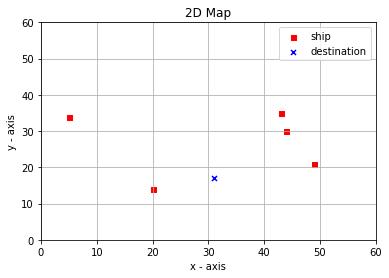

Position Ship  1 :  [44 30]  new pbest is  [44 30]
Position Ship  2 :  [49 21]  new pbest is  [49 21]
Position Ship  3 :  [ 5 34]  new pbest is  [ 5 34]
Position Ship  4 :  [20 14]  new pbest is  [20 14]
Position Ship  5 :  [43 35]  new pbest is  [43 35]

The current iteration best solution is:-
	Position:  [20 14]
	Distance from target (km):  11.4018
	Distance travelled (km):  0.0
	Total time travelled (km/h):  0.0
	Track:  [20 14]
--- iteration  2  ---


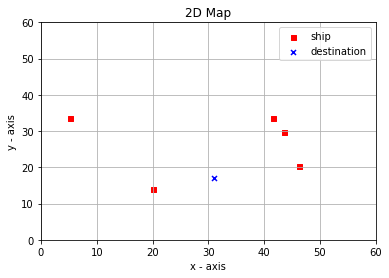

Position Ship  1 :  [43.63203793 29.75469195]  new pbest is  [43.63203793 29.75469195]
Position Ship  2 :  [46.15880373 20.314194  ]  new pbest is  [46.15880373 20.314194  ]
Position Ship  3 :  [ 5.28345348 33.62206203]  new pbest is  [ 5.28345348 33.62206203]
Position Ship  4 :  [20. 14.]  new pbest is  [20 14]
Position Ship  5 :  [41.60276332 33.72426216]  new pbest is  [41.60276332 33.72426216]

The current iteration best solution is:-
	Position:  [20. 14.]
	Distance from target (km):  11.4018
	Distance travelled (km):  0.0
	Total time travelled (km/h):  0.0
	Track:  [20. 14. 20. 14.]

--- 0.5646665096282959 seconds ---


In [2]:
import random as rand
import numpy as np
import matplotlib.pyplot as plt
import math
import time

rand.seed(50)
np.random.seed(50)

class Particle():
    def __init__(self):
        self.position = np.array([rand.randint(0, 50), rand.randint(0, 50)])
        self.pbest_position = self.position
        self.pbest_value = float('inf')
        self.velocity = np.array([0,0])
        self.travelled_distance = 0.0
        self.time_travelled = 0.0
        self.track = self.position

    def __str__(self, ind):
        print("Position Ship ", ind, ": ", self.position, " new pbest is ", self.pbest_position)
    
    def move(self):
        old_position = self.position
        self.position = self.position + self.velocity
        self.track = np.append(self.track, self.position, axis=0)
        distance = math.dist([old_position[0], old_position[1]], [self.position[0], self.position[1]])
        self.travelled_distance = self.travelled_distance + distance
        self.time_travelled = self.travelled_distance / speed
       
class Space():

    def __init__(self, target, min_distance, n_particles):
        self.target = np.array([rand.randint(0, 50), rand.randint(0, 50)])
        self.min_distance = min_distance
        self.n_particles = n_particles
        self.particles = []
        self.gbest_value = float('inf')
        self.gbest_position = np.array([rand.random()*50, rand.random()*50])
        self.gbest_travelled_distance = 0.0
        self.gbest_time_travelled = 0.0
        self.gbest_track = self.gbest_position

    def print_particles(self):
        ind = 1
        for particle in self.particles:
            particle.__str__(ind)
            ind += 1
   
    def fitness(self, particle):
        return round(math.dist([particle.position[0], particle.position[1]], [self.target[0], self.target[1]]),4)

    def set_pbest(self):
        for particle in self.particles:
            fitness_cadidate = self.fitness(particle)
            if(particle.pbest_value > fitness_cadidate):
                particle.pbest_value = fitness_cadidate
                particle.pbest_position = particle.position
            

    def set_gbest(self):
        self.gbest_value = float('inf')
        for particle in self.particles:
            best_fitness_cadidate = self.fitness(particle)
            if(self.gbest_value > best_fitness_cadidate):
                self.gbest_value = best_fitness_cadidate
                self.gbest_position = particle.position
                self.gbest_track = particle.track
                self.gbest_travelled_distance = particle.travelled_distance
                self.gbest_time_travelled = particle.time_travelled

    def move_particles(self):
        for particle in self.particles:
            global W
            new_velocity = (W*particle.velocity) + (c1*rand.random()) * (particle.pbest_position - particle.position) + \
                            (rand.random()*c2) * (self.gbest_position - particle.position)
            particle.velocity = new_velocity
#             print('particle velocity:', particle.velocity)
            particle.move()
    
    def plot(self):
        # x-axis values 
        x = [pc.position[0] for pc in self.particles]
#         x.append(self.target[0])
        # y-axis values 
        y = [pc.position[1] for pc in self.particles]
#         y.append(self.target[1])

        # plotting points as a scatter plot 
        plt.scatter(x, y, label="ship", color= "red",  
                    marker= "s", s=25)
        plt.scatter(self.target[0], self.target[1], label="destination", color= "blue",  
                    marker= "x", s=25)

        # x-axis label 
        plt.xlabel('x - axis') 
        plt.xlim([0, 60])
        # frequency label 
        plt.ylabel('y - axis')
        plt.ylim([0, 60])
        # plot title 
        plt.title('2D Map') 
        # showing legend 
        plt.legend()
        plt.grid(True)

        # function to show the plot 
        plt.show() 
            

            
##program start here
# n_particles = int(input("Inform the number of particles: "))
# n_iterations = int(input("Inform the number of iterations: "))
# target_error = float(input("Inform the target error: "))
start_time = time.time()
n_particles = 5
n_iterations = 2
min_distance = 0


W = 1.0
c1 = 0.1
c2 = 0.1 
speed = 13.75

search_space = Space(1, min_distance, n_particles)
particles_vector = [Particle() for _ in range(search_space.n_particles)]
search_space.particles = particles_vector
# search_space.print_particles()
print("Target destination: ", search_space.target)


iteration = 0
# time
while(iteration < n_iterations):
    print("--- iteration ", iteration+1, " ---")
    search_space.plot()
    search_space.set_pbest()    
    search_space.set_gbest()
    search_space.print_particles()

    if(search_space.gbest_value <= search_space.min_distance):
        break
      
   
    print("\nThe current iteration best solution is:-")
    print("\tPosition: ", search_space.gbest_position)
    print("\tDistance from target (km): ", search_space.gbest_value)
    print("\tDistance travelled (km): ", search_space.gbest_travelled_distance)
    print("\tTotal time travelled (km/h): ", search_space.gbest_time_travelled)
    print("\tTrack: ", search_space.gbest_track)
    search_space.move_particles()
    iteration += 1
print("\n--- %s seconds ---" % (time.time() - start_time))



# SIDI START HERE

Target destination:  [31 17]
--- iteration  1  ---


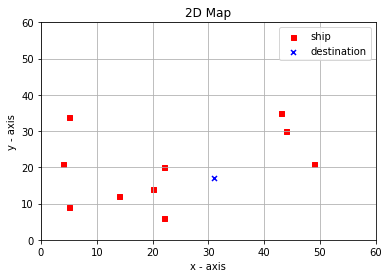

Position Ship  1 :  [44 30]  new pbest is  [44 30]
Position Ship  2 :  [49 21]  new pbest is  [49 21]
Position Ship  3 :  [ 5 34]  new pbest is  [ 5 34]
Position Ship  4 :  [20 14]  new pbest is  [20 14]
Position Ship  5 :  [43 35]  new pbest is  [43 35]
Position Ship  6 :  [5 9]  new pbest is  [5 9]
Position Ship  7 :  [22  6]  new pbest is  [22  6]
Position Ship  8 :  [22 20]  new pbest is  [22 20]
Position Ship  9 :  [14 12]  new pbest is  [14 12]
Position Ship  10 :  [ 4 21]  new pbest is  [ 4 21]

The current iteration best solution is:-
	Position:  [22 20]
	Distance from target (km):  9.4868
	Distance travelled (km):  0.0
	Total time travelled (km/h):  0.0
	Track:  [[22 20]]
--- iteration  2  ---


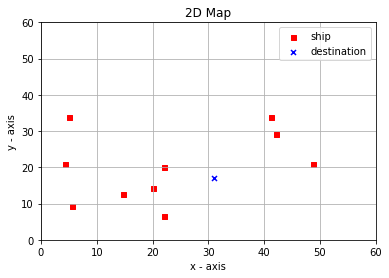

Position Ship  1 :  [42.035  29.1068]  new pbest is  [42.035  29.1068]
Position Ship  2 :  [48.7598 20.9911]  new pbest is  [48.7598 20.9911]
Position Ship  3 :  [ 5.1088 33.9104]  new pbest is  [ 5.1088 33.9104]
Position Ship  4 :  [20.0669 14.2006]  new pbest is  [20.0669 14.2006]
Position Ship  5 :  [41.2511 33.7508]  new pbest is  [41.2511 33.7508]
Position Ship  6 :  [5.5737 9.3712]  new pbest is  [5.5737 9.3712]
Position Ship  7 :  [22.      6.6082]  new pbest is  [22.      6.6082]
Position Ship  8 :  [22. 20.]  new pbest is  [22 20]
Position Ship  9 :  [14.725 12.725]  new pbest is  [14.725 12.725]
Position Ship  10 :  [ 4.2279 20.9873]  new pbest is  [ 4.2279 20.9873]

The current iteration best solution is:-
	Position:  [22. 20.]
	Distance from target (km):  9.4868
	Distance travelled (km):  0.0
	Total time travelled (km/h):  0.0
	Track:  [[22. 20.]
 [22. 20.]]
--- iteration  3  ---


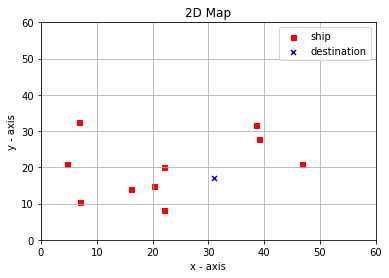

Position Ship  1 :  [38.9999 27.7272]  new pbest is  [38.9999 27.7272]
Position Ship  2 :  [46.6937 20.9146]  new pbest is  [46.6937 20.9146]
Position Ship  3 :  [ 6.8469 32.479 ]  new pbest is  [ 6.8469 32.479 ]
Position Ship  4 :  [20.325  14.9748]  new pbest is  [20.325  14.9748]
Position Ship  5 :  [38.4553 31.7538]  new pbest is  [38.4553 31.7538]
Position Ship  6 :  [ 6.9975 10.2925]  new pbest is  [ 6.9975 10.2925]
Position Ship  7 :  [22.     8.119]  new pbest is  [22.     8.119]
Position Ship  8 :  [22. 20.]  new pbest is  [22 20]
Position Ship  9 :  [16.0738 14.0738]  new pbest is  [16.0738 14.0738]
Position Ship  10 :  [ 4.7228 20.9598]  new pbest is  [ 4.7228 20.9598]

The current iteration best solution is:-
	Position:  [22. 20.]
	Distance from target (km):  9.4868
	Distance travelled (km):  0.0
	Total time travelled (km/h):  0.0
	Track:  [[22. 20.]
 [22. 20.]
 [22. 20.]]
--- iteration  4  ---


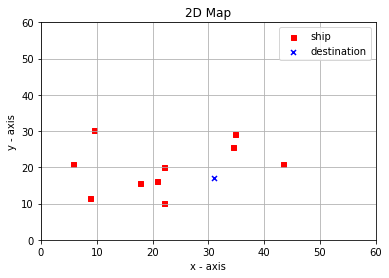

Position Ship  1 :  [34.4268 25.6485]  new pbest is  [34.4268 25.6485]
Position Ship  2 :  [43.4603 20.7949]  new pbest is  [43.4603 20.7949]
Position Ship  3 :  [ 9.5761 30.2314]  new pbest is  [ 9.5761 30.2314]
Position Ship  4 :  [20.746  16.2376]  new pbest is  [20.746  16.2376]
Position Ship  5 :  [34.7167 29.0834]  new pbest is  [34.7167 29.0834]
Position Ship  6 :  [ 8.8056 11.4624]  new pbest is  [ 8.8056 11.4624]
Position Ship  7 :  [22.     10.0289]  new pbest is  [22.     10.0289]
Position Ship  8 :  [22. 20.]  new pbest is  [22 20]
Position Ship  9 :  [17.8066 15.8066]  new pbest is  [17.8066 15.8066]
Position Ship  10 :  [ 5.6705 20.9071]  new pbest is  [ 5.6705 20.9071]

The current iteration best solution is:-
	Position:  [34.4268 25.6485]
	Distance from target (km):  9.3027
	Distance travelled (km):  10.515783874272616
	Total time travelled (km/h):  0.7647842817652811
	Track:  [[44.     30.    ]
 [42.035  29.1068]
 [38.9999 27.7272]
 [34.4268 25.6485]]
--- iteration  5 

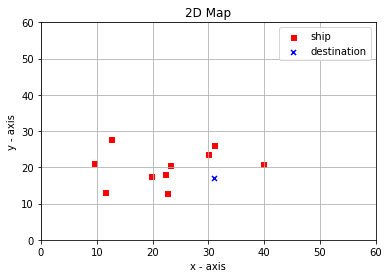

Position Ship  1 :  [29.8537 23.5698]  new pbest is  [29.8537 23.5698]
Position Ship  2 :  [39.8739 20.8649]  new pbest is  [39.8739 20.8649]
Position Ship  3 :  [12.6064 27.9283]  new pbest is  [12.6064 27.9283]
Position Ship  4 :  [22.2325 18.2334]  new pbest is  [22.2325 18.2334]
Position Ship  5 :  [30.9587 26.1836]  new pbest is  [30.9587 26.1836]
Position Ship  6 :  [11.4014 13.0684]  new pbest is  [11.4014 13.0684]
Position Ship  7 :  [22.6704 12.7815]  new pbest is  [22.6704 12.7815]
Position Ship  8 :  [23.1073 20.5033]  new pbest is  [23.1073 20.5033]
Position Ship  9 :  [19.8053 17.6968]  new pbest is  [19.8053 17.6968]
Position Ship  10 :  [ 9.4603 21.323 ]  new pbest is  [ 9.4603 21.323 ]

The current iteration best solution is:-
	Position:  [29.8537 23.5698]
	Distance from target (km):  6.6691
	Distance travelled (km):  15.539152992702995
	Total time travelled (km/h):  1.130120217651127
	Track:  [[44.     30.    ]
 [42.035  29.1068]
 [38.9999 27.7272]
 [34.4268 25.6485]
 

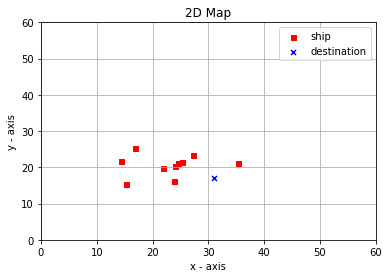

Position Ship  1 :  [25.2806 21.4911]  new pbest is  [29.8537 23.5698]
Position Ship  2 :  [35.3034 21.2006]  new pbest is  [35.3034 21.2006]
Position Ship  3 :  [16.8201 25.3261]  new pbest is  [16.8201 25.3261]
Position Ship  4 :  [23.9899 20.4189]  new pbest is  [23.9899 20.4189]
Position Ship  5 :  [27.1949 23.27  ]  new pbest is  [27.1949 23.27  ]
Position Ship  6 :  [15.3028 15.4174]  new pbest is  [15.3028 15.4174]
Position Ship  7 :  [23.764  16.1696]  new pbest is  [23.764  16.1696]
Position Ship  8 :  [24.4873 21.1305]  new pbest is  [24.4873 21.1305]
Position Ship  9 :  [21.9579 19.677 ]  new pbest is  [21.9579 19.677 ]
Position Ship  10 :  [14.3156 21.8563]  new pbest is  [14.3156 21.8563]

The current iteration best solution is:-
	Position:  [35.3034 21.2006]
	Distance from target (km):  6.0137
	Distance travelled (km):  13.713390429422809
	Total time travelled (km/h):  0.9973374857762043
	Track:  [[49.     21.    ]
 [48.7598 20.9911]
 [46.6937 20.9146]
 [43.4603 20.7949]


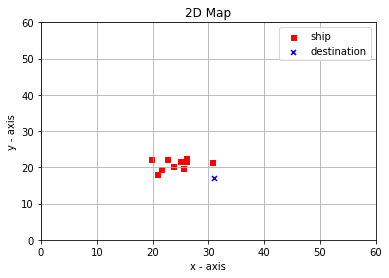

Position Ship  1 :  [21.4883 19.4524]  new pbest is  [29.8537 23.5698]
Position Ship  2 :  [30.7329 21.5363]  new pbest is  [30.7329 21.5363]
Position Ship  3 :  [22.5757 22.3797]  new pbest is  [22.5757 22.3797]
Position Ship  4 :  [26.0692 22.6266]  new pbest is  [26.0692 22.6266]
Position Ship  5 :  [23.6864 20.2912]  new pbest is  [27.1949 23.27  ]
Position Ship  6 :  [20.8255 18.2352]  new pbest is  [20.8255 18.2352]
Position Ship  7 :  [25.4871 19.8322]  new pbest is  [25.4871 19.8322]
Position Ship  8 :  [25.9412 21.7582]  new pbest is  [25.9412 21.7582]
Position Ship  9 :  [24.9469 21.7527]  new pbest is  [24.9469 21.7527]
Position Ship  10 :  [19.6961 22.3732]  new pbest is  [19.6961 22.3732]

The current iteration best solution is:-
	Position:  [30.7329 21.5363]
	Distance from target (km):  4.5442
	Distance travelled (km):  18.296202310789965
	Total time travelled (km/h):  1.3306328953301794
	Track:  [[49.     21.    ]
 [48.7598 20.9911]
 [46.6937 20.9146]
 [43.4603 20.7949]


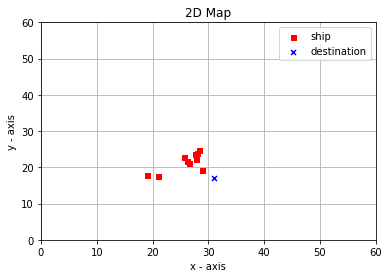

Position Ship  1 :  [18.9183 17.8644]  new pbest is  [29.8537 23.5698]
Position Ship  2 :  [26.1624 21.872 ]  new pbest is  [30.7329 21.5363]
Position Ship  3 :  [28.8682 19.3778]  new pbest is  [28.8682 19.3778]
Position Ship  4 :  [28.2875 24.8018]  new pbest is  [26.0692 22.6266]
Position Ship  5 :  [20.9162 17.5012]  new pbest is  [27.1949 23.27  ]
Position Ship  6 :  [26.5876 21.1328]  new pbest is  [26.5876 21.1328]
Position Ship  7 :  [27.5901 23.6182]  new pbest is  [25.4871 19.8322]
Position Ship  8 :  [27.7458 22.3697]  new pbest is  [27.7458 22.3697]
Position Ship  9 :  [27.994  23.8262]  new pbest is  [27.994  23.8262]
Position Ship  10 :  [25.5579 22.8536]  new pbest is  [25.5579 22.8536]

The current iteration best solution is:-
	Position:  [28.8682 19.3778]
	Distance from target (km):  3.1935
	Distance travelled (km):  28.124574569678288
	Total time travelled (km/h):  2.0454236050675116
	Track:  [[ 5.     34.    ]
 [ 5.1088 33.9104]
 [ 6.8469 32.479 ]
 [ 9.5761 30.2314]


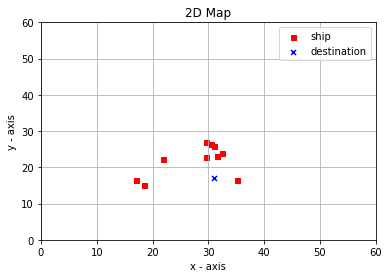

Position Ship  1 :  [16.9863 16.4655]  new pbest is  [29.8537 23.5698]
Position Ship  2 :  [21.8533 22.1773]  new pbest is  [30.7329 21.5363]
Position Ship  3 :  [35.1607 16.3759]  new pbest is  [28.8682 19.3778]
Position Ship  4 :  [30.5133 26.5226]  new pbest is  [26.0692 22.6266]
Position Ship  5 :  [18.4887 15.0095]  new pbest is  [27.1949 23.27  ]
Position Ship  6 :  [32.462 23.944]  new pbest is  [26.5876 21.1328]
Position Ship  7 :  [29.6038 26.9369]  new pbest is  [25.4871 19.8322]
Position Ship  8 :  [29.6105 22.8209]  new pbest is  [29.6105 22.8209]
Position Ship  9 :  [31.0512 25.8483]  new pbest is  [27.994  23.8262]
Position Ship  10 :  [31.5376 23.2103]  new pbest is  [31.5376 23.2103]

The current iteration best solution is:-
	Position:  [35.1607 16.3759]
	Distance from target (km):  4.2072
	Distance travelled (km):  35.09644374946071
	Total time travelled (km/h):  2.5524686363244156
	Track:  [[ 5.     34.    ]
 [ 5.1088 33.9104]
 [ 6.8469 32.479 ]
 [ 9.5761 30.2314]
 [1

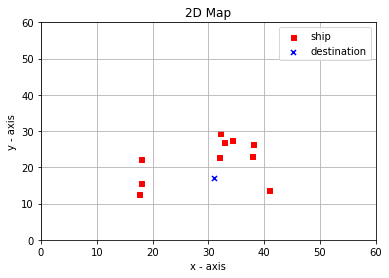

Position Ship  1 :  [17.9163 15.768 ]  new pbest is  [29.8537 23.5698]
Position Ship  2 :  [17.8863 22.406 ]  new pbest is  [30.7329 21.5363]
Position Ship  3 :  [40.9378 13.6199]  new pbest is  [28.8682 19.3778]
Position Ship  4 :  [32.8623 26.9841]  new pbest is  [26.0692 22.6266]
Position Ship  5 :  [17.6138 12.7741]  new pbest is  [27.1949 23.27  ]
Position Ship  6 :  [38.0016 26.5035]  new pbest is  [26.5876 21.1328]
Position Ship  7 :  [32.007  29.3893]  new pbest is  [25.4871 19.8322]
Position Ship  8 :  [31.9445 22.7271]  new pbest is  [31.9445 22.7271]
Position Ship  9 :  [34.291  27.4106]  new pbest is  [27.994  23.8262]
Position Ship  10 :  [37.7998 23.0342]  new pbest is  [31.5376 23.2103]

The current iteration best solution is:-
	Position:  [31.9445 22.7271]
	Distance from target (km):  5.8045
	Distance travelled (km):  10.475559017204894
	Total time travelled (km/h):  0.7618588376149014
	Track:  [[22.     20.    ]
 [22.     20.    ]
 [22.     20.    ]
 [22.     20.    ]


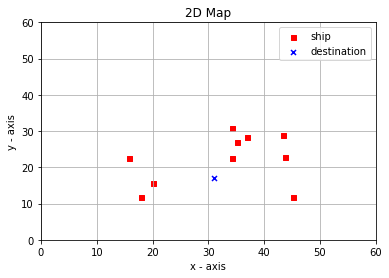

Position Ship  1 :  [20.1206 15.8015]  new pbest is  [29.8537 23.5698]
Position Ship  2 :  [15.8265 22.6253]  new pbest is  [30.7329 21.5363]
Position Ship  3 :  [45.1938 11.8446]  new pbest is  [28.8682 19.3778]
Position Ship  4 :  [35.0608 27.0762]  new pbest is  [26.0692 22.6266]
Position Ship  5 :  [17.9904 11.7701]  new pbest is  [27.1949 23.27  ]
Position Ship  6 :  [43.3581 28.976 ]  new pbest is  [26.5876 21.1328]
Position Ship  7 :  [34.2153 30.9272]  new pbest is  [25.4871 19.8322]
Position Ship  8 :  [34.2785 22.6333]  new pbest is  [31.9445 22.7271]
Position Ship  9 :  [36.8456 28.2615]  new pbest is  [27.994  23.8262]
Position Ship  10 :  [43.7357 22.86  ]  new pbest is  [31.5376 23.2103]

The current iteration best solution is:-
	Position:  [34.2785 22.6333]
	Distance from target (km):  6.5179
	Distance travelled (km):  12.811443098232893
	Total time travelled (km/h):  0.9317413162351195
	Track:  [[22.     20.    ]
 [22.     20.    ]
 [22.     20.    ]
 [22.     20.    ]


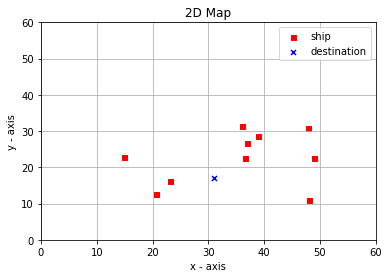

Position Ship  1 :  [23.2082 16.3034]  new pbest is  [29.8537 23.5698]
Position Ship  2 :  [14.8584 22.8019]  new pbest is  [30.7329 21.5363]
Position Ship  3 :  [47.9765 10.9439]  new pbest is  [28.8682 19.3778]
Position Ship  4 :  [36.8767 26.6034]  new pbest is  [26.0692 22.6266]
Position Ship  5 :  [20.5296 12.6502]  new pbest is  [27.1949 23.27  ]
Position Ship  6 :  [47.9162 30.9181]  new pbest is  [26.5876 21.1328]
Position Ship  7 :  [35.9616 31.4314]  new pbest is  [25.4871 19.8322]
Position Ship  8 :  [36.485  22.5446]  new pbest is  [31.9445 22.7271]
Position Ship  9 :  [38.8995 28.6258]  new pbest is  [27.994  23.8262]
Position Ship  10 :  [49.0152 22.6976]  new pbest is  [31.5376 23.2103]

The current iteration best solution is:-
	Position:  [36.485  22.5446]
	Distance from target (km):  7.7992
	Distance travelled (km):  15.01972522241902
	Total time travelled (km/h):  1.0923436525395651
	Track:  [[22.     20.    ]
 [22.     20.    ]
 [22.     20.    ]
 [22.     20.    ]
 

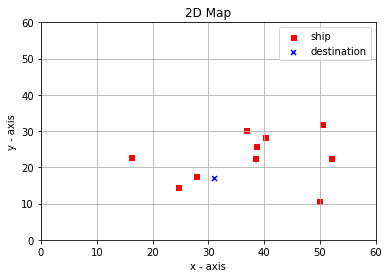

Position Ship  1 :  [27.7251 17.7151]  new pbest is  [27.7251 17.7151]
Position Ship  2 :  [16.1979 22.8612]  new pbest is  [30.7329 21.5363]
Position Ship  3 :  [49.7417 10.7102]  new pbest is  [28.8682 19.3778]
Position Ship  4 :  [38.5113 25.9679]  new pbest is  [26.0692 22.6266]
Position Ship  5 :  [24.5462 14.6756]  new pbest is  [24.5462 14.6756]
Position Ship  6 :  [50.4307 31.8452]  new pbest is  [26.5876 21.1328]
Position Ship  7 :  [36.7784 30.4326]  new pbest is  [25.4871 19.8322]
Position Ship  8 :  [38.3588 22.4693]  new pbest is  [31.9445 22.7271]
Position Ship  9 :  [40.215  28.3252]  new pbest is  [27.994  23.8262]
Position Ship  10 :  [51.9808 22.5795]  new pbest is  [31.5376 23.2103]

The current iteration best solution is:-
	Position:  [27.7251 17.7151]
	Distance from target (km):  3.3521
	Distance travelled (km):  41.501938095837474
	Total time travelled (km/h):  3.018322770606362
	Track:  [[44.     30.    ]
 [42.035  29.1068]
 [38.9999 27.7272]
 [34.4268 25.6485]
 

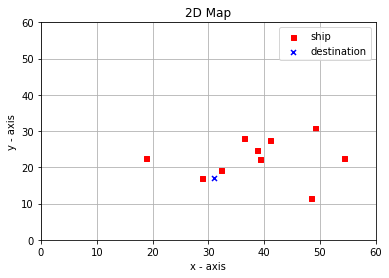

Position Ship  1 :  [32.242  19.1268]  new pbest is  [32.242  19.1268]
Position Ship  2 :  [18.808  22.4538]  new pbest is  [30.7329 21.5363]
Position Ship  3 :  [48.3729 11.5879]  new pbest is  [28.8682 19.3778]
Position Ship  4 :  [38.6709 24.7265]  new pbest is  [26.0692 22.6266]
Position Ship  5 :  [28.8552 16.9806]  new pbest is  [28.8552 16.9806]
Position Ship  6 :  [49.1438 30.7909]  new pbest is  [26.5876 21.1328]
Position Ship  7 :  [36.4625 27.9892]  new pbest is  [25.4871 19.8322]
Position Ship  8 :  [39.2265 22.2133]  new pbest is  [31.9445 22.7271]
Position Ship  9 :  [41.0351 27.6359]  new pbest is  [27.994  23.8262]
Position Ship  10 :  [54.3423 22.456 ]  new pbest is  [31.5376 23.2103]

The current iteration best solution is:-
	Position:  [28.8552 16.9806]
	Distance from target (km):  2.1449
	Distance travelled (km):  47.24404427354102
	Total time travelled (km/h):  3.435930492621165
	Track:  [[43.     35.    ]
 [41.2511 33.7508]
 [38.4553 31.7538]
 [34.7167 29.0834]
 [

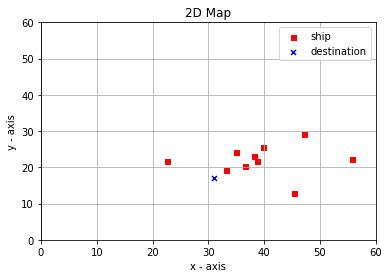

Position Ship  1 :  [36.5442 20.4024]  new pbest is  [32.242  19.1268]
Position Ship  2 :  [22.6701 21.7356]  new pbest is  [30.7329 21.5363]
Position Ship  3 :  [45.2654 13.03  ]  new pbest is  [28.8682 19.3778]
Position Ship  4 :  [38.2094 23.1332]  new pbest is  [26.0692 22.6266]
Position Ship  5 :  [33.1642 19.2856]  new pbest is  [28.8552 16.9806]
Position Ship  6 :  [47.1606 29.28  ]  new pbest is  [26.5876 21.1328]
Position Ship  7 :  [34.9677 24.318 ]  new pbest is  [25.4871 19.8322]
Position Ship  8 :  [38.7441 21.6202]  new pbest is  [31.9445 22.7271]
Position Ship  9 :  [39.7946 25.7298]  new pbest is  [27.994  23.8262]
Position Ship  10 :  [55.8329 22.3529]  new pbest is  [31.5376 23.2103]

The current iteration best solution is:-
	Position:  [33.1642 19.2856]
	Distance from target (km):  3.1477
	Distance travelled (km):  52.13081273541846
	Total time travelled (km/h):  3.791331835303161
	Track:  [[43.     35.    ]
 [41.2511 33.7508]
 [38.4553 31.7538]
 [34.7167 29.0834]
 [

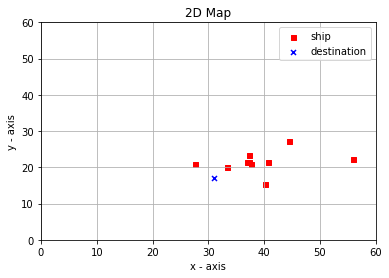

Position Ship  1 :  [40.621  21.6045]  new pbest is  [32.242  19.1268]
Position Ship  2 :  [27.587  20.8377]  new pbest is  [30.7329 21.5363]
Position Ship  3 :  [40.2149 15.3361]  new pbest is  [28.8682 19.3778]
Position Ship  4 :  [36.9324 21.3536]  new pbest is  [36.9324 21.3536]
Position Ship  5 :  [37.238  21.4648]  new pbest is  [28.8552 16.9806]
Position Ship  6 :  [44.507  27.3774]  new pbest is  [26.5876 21.1328]
Position Ship  7 :  [33.289  20.1709]  new pbest is  [33.289  20.1709]
Position Ship  8 :  [37.5914 20.8456]  new pbest is  [31.9445 22.7271]
Position Ship  9 :  [37.3215 23.3448]  new pbest is  [27.994  23.8262]
Position Ship  10 :  [55.9568 22.2873]  new pbest is  [31.5376 23.2103]

The current iteration best solution is:-
	Position:  [33.289  20.1709]
	Distance from target (km):  3.9108
	Distance travelled (km):  42.81668533177111
	Total time travelled (km/h):  3.1139407514015356
	Track:  [[22.      6.    ]
 [22.      6.6082]
 [22.      8.119 ]
 [22.     10.0289]
 

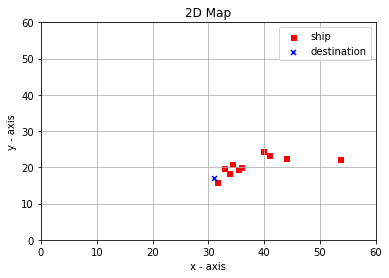

Position Ship  1 :  [43.8833 22.6321]  new pbest is  [32.242  19.1268]
Position Ship  2 :  [32.7422 19.9358]  new pbest is  [32.7422 19.9358]
Position Ship  3 :  [33.6618 18.335 ]  new pbest is  [33.6618 18.335 ]
Position Ship  4 :  [35.3883 19.4873]  new pbest is  [35.3883 19.4873]
Position Ship  5 :  [40.937  23.4814]  new pbest is  [28.8552 16.9806]
Position Ship  6 :  [39.7735 24.4658]  new pbest is  [26.5876 21.1328]
Position Ship  7 :  [31.6103 16.0238]  new pbest is  [31.6103 16.0238]
Position Ship  8 :  [35.9252 20.1832]  new pbest is  [31.9445 22.7271]
Position Ship  9 :  [34.1724 20.8758]  new pbest is  [34.1724 20.8758]
Position Ship  10 :  [53.6561 22.2426]  new pbest is  [31.5376 23.2103]

The current iteration best solution is:-
	Position:  [31.6103 16.0238]
	Distance from target (km):  1.1513
	Distance travelled (km):  47.29066254449806
	Total time travelled (km/h):  3.439320912327132
	Track:  [[22.      6.    ]
 [22.      6.6082]
 [22.      8.119 ]
 [22.     10.0289]
 [

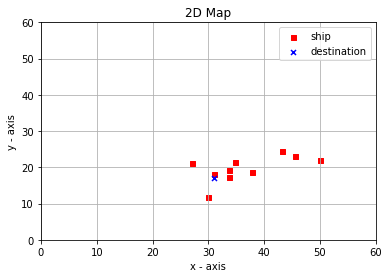

Position Ship  1 :  [45.5606 23.0332]  new pbest is  [32.242  19.1268]
Position Ship  2 :  [37.8385 18.8303]  new pbest is  [32.7422 19.9358]
Position Ship  3 :  [27.0631 21.2826]  new pbest is  [33.6618 18.335 ]
Position Ship  4 :  [33.6355 17.4297]  new pbest is  [33.6355 17.4297]
Position Ship  5 :  [43.1248 24.5517]  new pbest is  [28.8552 16.9806]
Position Ship  6 :  [34.8263 21.4323]  new pbest is  [34.8263 21.4323]
Position Ship  7 :  [29.9316 11.8767]  new pbest is  [31.6103 16.0238]
Position Ship  8 :  [33.6559 19.2732]  new pbest is  [33.6559 19.2732]
Position Ship  9 :  [30.9429 18.2546]  new pbest is  [30.9429 18.2546]
Position Ship  10 :  [49.9953 21.9008]  new pbest is  [31.5376 23.2103]

The current iteration best solution is:-
	Position:  [30.9429 18.2546]
	Distance from target (km):  1.2559
	Distance travelled (km):  46.71632388830835
	Total time travelled (km/h):  3.3975508282406075
	Track:  [[14.     12.    ]
 [14.725  12.725 ]
 [16.0738 14.0738]
 [17.8066 15.8066]
 

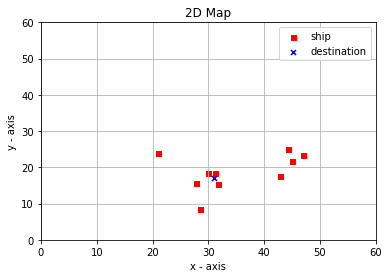

Position Ship  1 :  [47.0075 23.3663]  new pbest is  [32.242  19.1268]
Position Ship  2 :  [42.9008 17.7272]  new pbest is  [32.7422 19.9358]
Position Ship  3 :  [20.9587 23.9983]  new pbest is  [33.6618 18.335 ]
Position Ship  4 :  [31.7632 15.4087]  new pbest is  [31.7632 15.4087]
Position Ship  5 :  [44.2195 25.0462]  new pbest is  [28.8552 16.9806]
Position Ship  6 :  [29.8768 18.3969]  new pbest is  [29.8768 18.3969]
Position Ship  7 :  [28.4704  8.5878]  new pbest is  [31.6103 16.0238]
Position Ship  8 :  [31.2212 18.3011]  new pbest is  [31.2212 18.3011]
Position Ship  9 :  [27.7134 15.6334]  new pbest is  [30.9429 18.2546]
Position Ship  10 :  [44.907  21.6329]  new pbest is  [31.5376 23.2103]

The current iteration best solution is:-
	Position:  [31.2212 18.3011]
	Distance from target (km):  1.3198
	Distance travelled (km):  26.812600900474507
	Total time travelled (km/h):  1.9500073382163279
	Track:  [[22.     20.    ]
 [22.     20.    ]
 [22.     20.    ]
 [22.     20.    ]


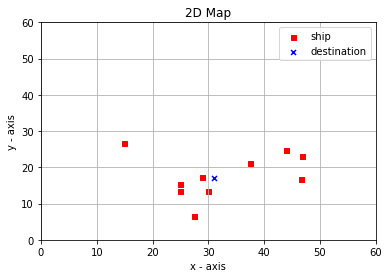

Position Ship  1 :  [46.7677 23.1892]  new pbest is  [32.242  19.1268]
Position Ship  2 :  [46.5522 16.8228]  new pbest is  [32.7422 19.9358]
Position Ship  3 :  [14.8965 26.6947]  new pbest is  [33.6618 18.335 ]
Position Ship  4 :  [29.8656 13.5229]  new pbest is  [31.7632 15.4087]
Position Ship  5 :  [43.9782 24.8408]  new pbest is  [28.8552 16.9806]
Position Ship  6 :  [24.9878 15.3572]  new pbest is  [29.8768 18.3969]
Position Ship  7 :  [27.4595  6.5986]  new pbest is  [31.6103 16.0238]
Position Ship  8 :  [28.7865 17.329 ]  new pbest is  [31.2212 18.3011]
Position Ship  9 :  [24.9651 13.3869]  new pbest is  [30.9429 18.2546]
Position Ship  10 :  [37.4247 21.1786]  new pbest is  [31.5376 23.2103]

The current iteration best solution is:-
	Position:  [28.7865 17.329 ]
	Distance from target (km):  2.2378
	Distance travelled (km):  29.43419249719586
	Total time travelled (km/h):  2.140668545250608
	Track:  [[22.     20.    ]
 [22.     20.    ]
 [22.     20.    ]
 [22.     20.    ]
 [

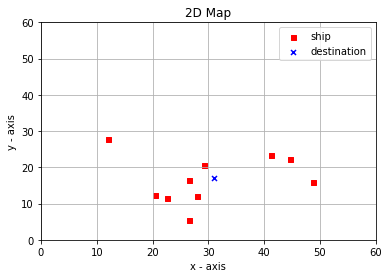

Position Ship  1 :  [44.7154 22.429 ]  new pbest is  [32.242  19.1268]
Position Ship  2 :  [48.8072 16.0101]  new pbest is  [32.7422 19.9358]
Position Ship  3 :  [11.9605 27.684 ]  new pbest is  [33.6618 18.335 ]
Position Ship  4 :  [27.964  12.0372]  new pbest is  [31.7632 15.4087]
Position Ship  5 :  [41.1878 23.3395]  new pbest is  [28.8552 16.9806]
Position Ship  6 :  [20.3693 12.4648]  new pbest is  [29.8768 18.3969]
Position Ship  7 :  [26.5607  5.4144]  new pbest is  [31.6103 16.0238]
Position Ship  8 :  [26.5406 16.4323]  new pbest is  [31.2212 18.3011]
Position Ship  9 :  [22.5618 11.4482]  new pbest is  [30.9429 18.2546]
Position Ship  10 :  [29.1348 20.6533]  new pbest is  [29.1348 20.6533]

The current iteration best solution is:-
	Position:  [29.1348 20.6533]
	Distance from target (km):  4.1019
	Distance travelled (km):  78.97515980814435
	Total time travelled (km/h):  5.743647986046862
	Track:  [[ 4.     21.    ]
 [ 4.2279 20.9873]
 [ 4.7228 20.9598]
 [ 5.6705 20.9071]
 [

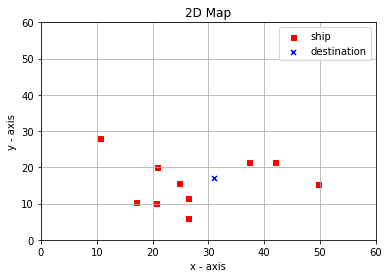

Position Ship  1 :  [41.8562 21.4945]  new pbest is  [32.242  19.1268]
Position Ship  2 :  [49.6853 15.5295]  new pbest is  [32.7422 19.9358]
Position Ship  3 :  [10.5408 28.0498]  new pbest is  [33.6618 18.335 ]
Position Ship  4 :  [26.2834 11.4853]  new pbest is  [31.7632 15.4087]
Position Ship  5 :  [37.2073 21.3977]  new pbest is  [28.8552 16.9806]
Position Ship  6 :  [16.9743 10.4764]  new pbest is  [29.8768 18.3969]
Position Ship  7 :  [26.2972  6.1425]  new pbest is  [31.6103 16.0238]
Position Ship  8 :  [24.7841 15.7686]  new pbest is  [31.2212 18.3011]
Position Ship  9 :  [20.6995 10.2166]  new pbest is  [30.9429 18.2546]
Position Ship  10 :  [20.8449 20.128 ]  new pbest is  [29.1348 20.6533]

The current iteration best solution is:-
	Position:  [24.7841 15.7686]
	Distance from target (km):  6.3367
	Distance travelled (km):  33.73019350202474
	Total time travelled (km/h):  2.453104981965436
	Track:  [[22.     20.    ]
 [22.     20.    ]
 [22.     20.    ]
 [22.     20.    ]
 [

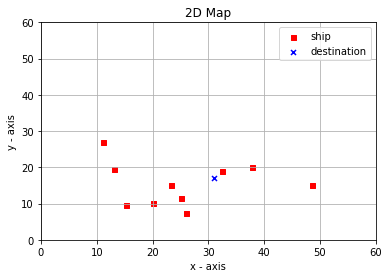

Position Ship  1 :  [37.7571 20.147 ]  new pbest is  [32.242  19.1268]
Position Ship  2 :  [48.5587 15.2377]  new pbest is  [32.7422 19.9358]
Position Ship  3 :  [11.108  27.0527]  new pbest is  [33.6618 18.335 ]
Position Ship  4 :  [25.0473 11.5747]  new pbest is  [31.7632 15.4087]
Position Ship  5 :  [32.46   19.1004]  new pbest is  [28.8552 16.9806]
Position Ship  6 :  [15.2095  9.5256]  new pbest is  [29.8768 18.3969]
Position Ship  7 :  [25.9945  7.3707]  new pbest is  [31.6103 16.0238]
Position Ship  8 :  [23.3907 15.2477]  new pbest is  [31.2212 18.3011]
Position Ship  9 :  [20.1514 10.2278]  new pbest is  [30.9429 18.2546]
Position Ship  10 :  [13.0279 19.5499]  new pbest is  [29.1348 20.6533]

The current iteration best solution is:-
	Position:  [32.46   19.1004]
	Distance from target (km):  2.558
	Distance travelled (km):  77.78895442540887
	Total time travelled (km/h):  5.6573785036661
	Track:  [[43.     35.    ]
 [41.2511 33.7508]
 [38.4553 31.7538]
 [34.7167 29.0834]
 [30.

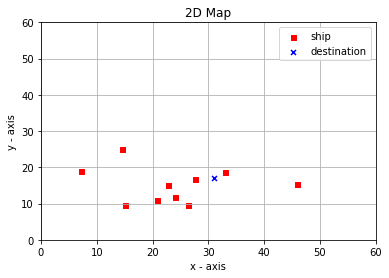

Position Ship  1 :  [32.897  18.6549]  new pbest is  [32.242  19.1268]
Position Ship  2 :  [45.9277 15.3195]  new pbest is  [32.7422 19.9358]
Position Ship  3 :  [14.599  24.9496]  new pbest is  [33.6618 18.335 ]
Position Ship  4 :  [23.9844 11.7707]  new pbest is  [31.7632 15.4087]
Position Ship  5 :  [27.5935 16.733 ]  new pbest is  [28.8552 16.9806]
Position Ship  6 :  [15.018   9.4771]  new pbest is  [29.8768 18.3969]
Position Ship  7 :  [26.3008  9.6387]  new pbest is  [31.6103 16.0238]
Position Ship  8 :  [22.8062 15.0442]  new pbest is  [31.2212 18.3011]
Position Ship  9 :  [20.7427 11.0743]  new pbest is  [30.9429 18.2546]
Position Ship  10 :  [ 7.2524 19.06  ]  new pbest is  [29.1348 20.6533]

The current iteration best solution is:-
	Position:  [32.897  18.6549]
	Distance from target (km):  2.5174
	Distance travelled (km):  76.49522753127549
	Total time travelled (km/h):  5.563289275001853
	Track:  [[44.     30.    ]
 [42.035  29.1068]
 [38.9999 27.7272]
 [34.4268 25.6485]
 [

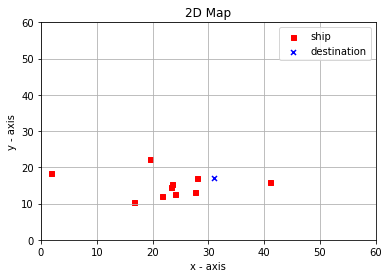

Position Ship  1 :  [28.0312 17.1669]  new pbest is  [32.242  19.1268]
Position Ship  2 :  [41.016  16.0859]  new pbest is  [32.7422 19.9358]
Position Ship  3 :  [19.4772 22.3679]  new pbest is  [33.6618 18.335 ]
Position Ship  4 :  [24.02   12.6479]  new pbest is  [31.7632 15.4087]
Position Ship  5 :  [23.3375 14.5698]  new pbest is  [28.8552 16.9806]
Position Ship  6 :  [16.695  10.4921]  new pbest is  [29.8768 18.3969]
Position Ship  7 :  [27.6729 13.2788]  new pbest is  [31.6103 16.0238]
Position Ship  8 :  [23.4541 15.3021]  new pbest is  [31.2212 18.3011]
Position Ship  9 :  [21.6226 12.1124]  new pbest is  [30.9429 18.2546]
Position Ship  10 :  [ 1.7205 18.5672]  new pbest is  [29.1348 20.6533]

The current iteration best solution is:-
	Position:  [28.0312 17.1669]
	Distance from target (km):  2.9735
	Distance travelled (km):  81.58346432214913
	Total time travelled (km/h):  5.933342859792663
	Track:  [[44.     30.    ]
 [42.035  29.1068]
 [38.9999 27.7272]
 [34.4268 25.6485]
 [

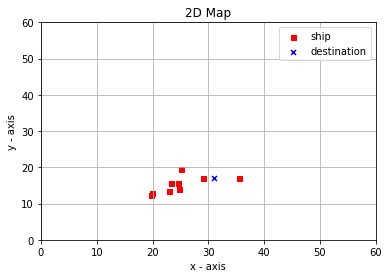

Position Ship  1 :  [23.3225 15.752 ]  new pbest is  [32.242  19.1268]
Position Ship  2 :  [35.4097 17.0003]  new pbest is  [32.7422 19.9358]
Position Ship  3 :  [25.0915 19.4439]  new pbest is  [33.6618 18.335 ]
Position Ship  4 :  [24.8085 13.9503]  new pbest is  [31.7632 15.4087]
Position Ship  5 :  [19.8382 12.7878]  new pbest is  [28.8552 16.9806]
Position Ship  6 :  [19.7731 12.3407]  new pbest is  [29.8768 18.3969]
Position Ship  7 :  [29.1045 17.0625]  new pbest is  [31.6103 16.0238]
Position Ship  8 :  [24.5334 15.7344]  new pbest is  [31.2212 18.3011]
Position Ship  9 :  [22.9256 13.451 ]  new pbest is  [30.9429 18.2546]
Position Ship  10 :  [-2.7887 18.1343]  new pbest is  [29.1348 20.6533]

The current iteration best solution is:-
	Position:  [29.1045 17.0625]
	Distance from target (km):  1.8965
	Distance travelled (km):  71.34496271081893
	Total time travelled (km/h):  5.188724560786832
	Track:  [[22.      6.    ]
 [22.      6.6082]
 [22.      8.119 ]
 [22.     10.0289]
 [

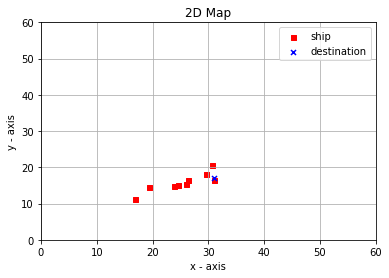

Position Ship  1 :  [19.2764 14.5641]  new pbest is  [32.242  19.1268]
Position Ship  2 :  [29.6124 18.0865]  new pbest is  [29.6124 18.0865]
Position Ship  3 :  [31.0098 16.3995]  new pbest is  [31.0098 16.3995]
Position Ship  4 :  [26.0815 15.4475]  new pbest is  [31.7632 15.4087]
Position Ship  5 :  [16.8452 11.2411]  new pbest is  [28.8552 16.9806]
Position Ship  6 :  [23.8728 14.7992]  new pbest is  [29.8768 18.3969]
Position Ship  7 :  [30.7218 20.7692]  new pbest is  [31.6103 16.0238]
Position Ship  8 :  [26.2874 16.3953]  new pbest is  [31.2212 18.3011]
Position Ship  9 :  [24.586  14.9991]  new pbest is  [30.9429 18.2546]
Position Ship  10 :  [-3.9583 17.6638]  new pbest is  [29.1348 20.6533]

The current iteration best solution is:-
	Position:  [31.0098 16.3995]
	Distance from target (km):  0.6006
	Distance travelled (km):  117.45962000766355
	Total time travelled (km/h):  8.542517818739167
	Track:  [[ 5.     34.    ]
 [ 5.1088 33.9104]
 [ 6.8469 32.479 ]
 [ 9.5761 30.2314]
 

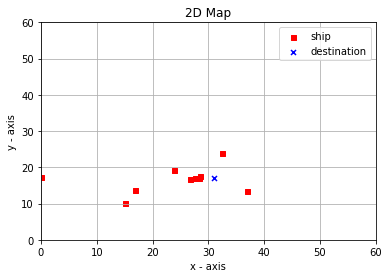

Position Ship  1 :  [16.924  13.7787]  new pbest is  [32.242  19.1268]
Position Ship  2 :  [23.846  19.1354]  new pbest is  [29.6124 18.0865]
Position Ship  3 :  [36.9281 13.3551]  new pbest is  [31.0098 16.3995]
Position Ship  4 :  [27.5441 16.9644]  new pbest is  [31.7632 15.4087]
Position Ship  5 :  [15.1087 10.2012]  new pbest is  [28.8552 16.9806]
Position Ship  6 :  [28.5005 17.4725]  new pbest is  [29.8768 18.3969]
Position Ship  7 :  [32.4247 23.9593]  new pbest is  [31.6103 16.0238]
Position Ship  8 :  [28.3461 17.073 ]  new pbest is  [31.2212 18.3011]
Position Ship  9 :  [26.7391 16.6798]  new pbest is  [30.9429 18.2546]
Position Ship  10 :  [ 0.0899 17.4133]  new pbest is  [29.1348 20.6533]

The current iteration best solution is:-
	Position:  [28.5005 17.4725]
	Distance from target (km):  2.5438
	Distance travelled (km):  108.54480710662375
	Total time travelled (km/h):  7.894167789572636
	Track:  [[ 5.      9.    ]
 [ 5.5737  9.3712]
 [ 6.9975 10.2925]
 [ 8.8056 11.4624]
 

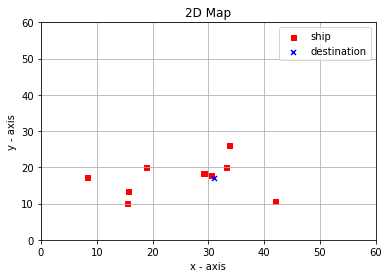

Position Ship  1 :  [15.64   13.3486]  new pbest is  [32.242  19.1268]
Position Ship  2 :  [18.7959 20.0232]  new pbest is  [29.6124 18.0865]
Position Ship  3 :  [41.9671 10.7461]  new pbest is  [31.0098 16.3995]
Position Ship  4 :  [29.4801 18.378 ]  new pbest is  [31.7632 15.4087]
Position Ship  5 :  [15.4799 10.2601]  new pbest is  [28.8552 16.9806]
Position Ship  6 :  [33.2102 20.2009]  new pbest is  [29.8768 18.3969]
Position Ship  7 :  [33.7775 26.2449]  new pbest is  [31.6103 16.0238]
Position Ship  8 :  [30.4523 17.7774]  new pbest is  [30.4523 17.7774]
Position Ship  9 :  [29.0311 18.4132]  new pbest is  [30.9429 18.2546]
Position Ship  10 :  [ 8.2031 17.4283]  new pbest is  [29.1348 20.6533]

The current iteration best solution is:-
	Position:  [30.4523 17.7774]
	Distance from target (km):  0.951
	Distance travelled (km):  43.959314666658386
	Total time travelled (km/h):  3.1970410666660642
	Track:  [[22.     20.    ]
 [22.     20.    ]
 [22.     20.    ]
 [22.     20.    ]
 

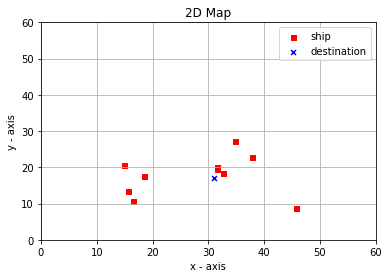

Position Ship  1 :  [15.6242 13.3302]  new pbest is  [32.242  19.1268]
Position Ship  2 :  [14.8366 20.7095]  new pbest is  [29.6124 18.0865]
Position Ship  3 :  [45.7275  8.8845]  new pbest is  [31.0098 16.3995]
Position Ship  4 :  [31.5539 19.6574]  new pbest is  [31.7632 15.4087]
Position Ship  5 :  [16.5684 10.6793]  new pbest is  [28.8552 16.9806]
Position Ship  6 :  [37.7784 22.8235]  new pbest is  [29.8768 18.3969]
Position Ship  7 :  [34.7559 27.2882]  new pbest is  [31.6103 16.0238]
Position Ship  8 :  [32.5585 18.4818]  new pbest is  [30.4523 17.7774]
Position Ship  9 :  [31.5626 20.1033]  new pbest is  [30.9429 18.2546]
Position Ship  10 :  [18.4078 17.7428]  new pbest is  [29.1348 20.6533]

The current iteration best solution is:-
	Position:  [32.5585 18.4818]
	Distance from target (km):  2.1505
	Distance travelled (km):  46.18018337056684
	Total time travelled (km/h):  3.358558790586679
	Track:  [[22.     20.    ]
 [22.     20.    ]
 [22.     20.    ]
 [22.     20.    ]
 [

In [3]:
import random as rand
import numpy as np
import matplotlib.pyplot as plt
import math
import time

rand.seed(50)
np.random.seed(50)

class Particle():
    def __init__(self):
        self.position = np.array([rand.randint(0, 50), rand.randint(0, 50)])
        self.pbest_position = self.position
        self.pbest_value = float('inf')
        self.velocity = np.array([0,0])
        self.travelled_distance = 0.0
        self.time_travelled = 0.0
        self.track = self.position

    def __str__(self, ind):
        print("Position Ship ", ind, ": ", self.position, " new pbest is ", self.pbest_position)
    
    def move(self):
        old_position = self.position
        self.position = self.position + self.velocity
        self.track = np.append(self.track, self.position, axis=0)
        distance = math.dist([old_position[0], old_position[1]], [self.position[0], self.position[1]])
        self.travelled_distance = self.travelled_distance + distance
        self.time_travelled = self.travelled_distance / speed
       
class Space():

    def __init__(self, target, min_distance, n_particles):
        self.target = np.array([rand.randint(0, 50), rand.randint(0, 50)])
        self.min_distance = min_distance
        self.n_particles = n_particles
        self.particles = []
        self.gbest_value = float('inf')
        self.gbest_position = np.array([rand.random()*50, rand.random()*50])
        self.gbest_travelled_distance = 0.0
        self.gbest_time_travelled = 0.0
        self.gbest_track = self.gbest_position

    def print_particles(self):
        ind = 1
        for particle in self.particles:
            particle.__str__(ind)
            ind += 1
   
    def fitness(self, particle):
        return round(math.dist([particle.position[0], particle.position[1]], [self.target[0], self.target[1]]),4)

    def set_pbest(self):
        for particle in self.particles:
            fitness_cadidate = self.fitness(particle)
            if(particle.pbest_value > fitness_cadidate):
                particle.pbest_value = fitness_cadidate
                particle.pbest_position = particle.position
            

    def set_gbest(self):
        self.gbest_value = float('inf')
        for particle in self.particles:
            best_fitness_cadidate = self.fitness(particle)
            if(self.gbest_value > best_fitness_cadidate):
                self.gbest_value = best_fitness_cadidate
                self.gbest_position = particle.position
                self.gbest_track = particle.track
                self.gbest_travelled_distance = particle.travelled_distance
                self.gbest_time_travelled = particle.time_travelled

    def move_particles(self):
        for particle in self.particles:
            global W
            new_velocity = (W*particle.velocity) + (c1*rand.random()) * (particle.pbest_position - particle.position) + \
                            (rand.random()*c2) * (self.gbest_position - particle.position)
            particle.velocity = np.round(new_velocity, decimals=4)
#             print('particle velocity:', particle.velocity)
            particle.move()
    
    def plot(self):
        # x-axis values 
        x = [pc.position[0] for pc in self.particles]
#         x.append(self.target[0])
        # y-axis values 
        y = [pc.position[1] for pc in self.particles]
#         y.append(self.target[1])

        # plotting points as a scatter plot 
        plt.scatter(x, y, label="ship", color= "red",  
                    marker= "s", s=25)
        plt.scatter(self.target[0], self.target[1], label="destination", color= "blue",  
                    marker= "x", s=25)

        # x-axis label 
        plt.xlabel('x - axis') 
        plt.xlim([0, 60])
        # frequency label 
        plt.ylabel('y - axis')
        plt.ylim([0, 60])
        # plot title 
        plt.title('2D Map') 
        # showing legend 
        plt.legend()
        plt.grid(True)

        # function to show the plot 
        plt.show() 
            

            
##program start here
# n_particles = int(input("Inform the number of particles: "))
# n_iterations = int(input("Inform the number of iterations: "))
# target_error = float(input("Inform the target error: "))
start_time = time.time()
n_particles = 10
n_iterations = 30
min_distance = 0


W = 1.0
c1 = 0.1
c2 = 0.1 
speed = 13.75

search_space = Space(1, min_distance, n_particles)
particles_vector = [Particle() for _ in range(search_space.n_particles)]
search_space.particles = particles_vector
# search_space.print_particles()
print("Target destination: ", search_space.target)


iteration = 0
# time
while(iteration < n_iterations):
    print("--- iteration ", iteration+1, " ---")
    search_space.plot()
    search_space.set_pbest()    
    search_space.set_gbest()
    search_space.print_particles()

    if(search_space.gbest_value <= search_space.min_distance):
        break
    c=search_space.gbest_track
    track2d = np.reshape(c, (-1, 2))
    print("\nThe current iteration best solution is:-")
    print("\tPosition: ", search_space.gbest_position)
    print("\tDistance from target (km): ", search_space.gbest_value)
    print("\tDistance travelled (km): ", search_space.gbest_travelled_distance)
    print("\tTotal time travelled (km/h): ", search_space.gbest_time_travelled)
    print("\tTrack: ", track2d)
    search_space.move_particles()
    iteration += 1
print("\n--- %s seconds ---" % (time.time() - start_time))



In [4]:
a = np.array([1,2])
b = np.array([2,1])
c = []
c.append(a)
a = np.append(a, b, axis=0)
print(a)
c = np.reshape(a, (-1, 2))
print(c)

[1 2 2 1]
[[1 2]
 [2 1]]


# END

In [5]:
import random
import numpy as np 

W = 0.5
c1 = 0.8
c2 = 0.9 

n_iterations = int(input("Inform the number of iterations: "))
target_error = float(input("Inform the target error: "))
n_particles = int(input("Inform the number of particles: "))

class Particle():
    def __init__(self):
        self.position = np.array([(-1) ** (bool(random.getrandbits(1))) * random.random()*50, (-1)**(bool(random.getrandbits(1))) * random.random()*50])
        self.pbest_position = self.position
        self.pbest_value = float('inf')
        self.velocity = np.array([0,0])

    def __str__(self):
        print("I am at ", self.position, " meu pbest is ", self.pbest_position)
    
    def move(self):
        self.position = self.position + self.velocity


class Space():

    def __init__(self, target, target_error, n_particles):
        self.target = target
        self.target_error = target_error
        self.n_particles = n_particles
        self.particles = []
        self.gbest_value = float('inf')
        self.gbest_position = np.array([random.random()*50, random.random()*50])

    def print_particles(self):
        for particle in self.particles:
            particle.__str__()
   
    def fitness(self, particle):
        return particle.position[0] ** 2 + particle.position[1] ** 2 + 1

    def set_pbest(self):
        for particle in self.particles:
            fitness_cadidate = self.fitness(particle)
            if(particle.pbest_value > fitness_cadidate):
                particle.pbest_value = fitness_cadidate
                particle.pbest_position = particle.position
            

    def set_gbest(self):
        for particle in self.particles:
            best_fitness_cadidate = self.fitness(particle)
            if(self.gbest_value > best_fitness_cadidate):
                self.gbest_value = best_fitness_cadidate
                self.gbest_position = particle.position

    def move_particles(self):
        for particle in self.particles:
            global W
            new_velocity = (W*particle.velocity) + (c1*random.random()) * (particle.pbest_position - particle.position) + \
                            (random.random()*c2) * (self.gbest_position - particle.position)
            particle.velocity = new_velocity
            particle.move()
            

search_space = Space(1, target_error, n_particles)
particles_vector = [Particle() for _ in range(search_space.n_particles)]
search_space.particles = particles_vector
search_space.print_particles()

iteration = 0
while(iteration < n_iterations):
    search_space.set_pbest()    
    search_space.set_gbest()

    if(abs(search_space.gbest_value - search_space.target) <= search_space.target_error):
        break

    search_space.move_particles()
    iteration += 1
    
print("The best solution is: ", search_space.gbest_position, " in n_iterations: ", iteration)


Inform the number of iterations: 10
Inform the target error: 0
Inform the number of particles: 10
I am at  [-7.15323106 22.70787659]  meu pbest is  [-7.15323106 22.70787659]
I am at  [-29.6695332   35.84997019]  meu pbest is  [-29.6695332   35.84997019]
I am at  [ 49.29453896 -23.00773292]  meu pbest is  [ 49.29453896 -23.00773292]
I am at  [17.5842029  21.06979758]  meu pbest is  [17.5842029  21.06979758]
I am at  [13.70568668 12.19808187]  meu pbest is  [13.70568668 12.19808187]
I am at  [-35.28554738  35.78963669]  meu pbest is  [-35.28554738  35.78963669]
I am at  [-16.58795696  23.57774817]  meu pbest is  [-16.58795696  23.57774817]
I am at  [ 18.42679604 -38.91422582]  meu pbest is  [ 18.42679604 -38.91422582]
I am at  [25.82455604 41.66052774]  meu pbest is  [25.82455604 41.66052774]
I am at  [-14.07425243  41.71925189]  meu pbest is  [-14.07425243  41.71925189]
The best solution is:  [-0.06281721 -0.21652187]  in n_iterations:  10


In [57]:
import random
import numpy as np 

#function that models the problem
def fitness_function(position):
    return position[0]**2 + position[1]**2 + 1

#Some variables to calculate the velocity
W = 0.5
c1 = 0.5
c2 = 0.9
target = 1

n_iterations = int(input("Inform the number of iterations: "))
target_error = float(input("Inform the target error: "))
n_particles = int(input("Inform the number of particles: "))

particle_position_vector = np.array([np.array([(-1) ** (bool(random.getrandbits(1))) * random.random()*50, (-1)**(bool(random.getrandbits(1))) * random.random()*50]) for _ in range(n_particles)])
pbest_position = particle_position_vector
pbest_fitness_value = np.array([float('inf') for _ in range(n_particles)])
gbest_fitness_value = float('inf')
gbest_position = np.array([float('inf'), float('inf')])

velocity_vector = ([np.array([0, 0]) for _ in range(n_particles)])
iteration = 0
while iteration < n_iterations:
    for i in range(n_particles):
        fitness_cadidate = fitness_function(particle_position_vector[i])
        print(fitness_cadidate, ' ', particle_position_vector[i])
        
        if(pbest_fitness_value[i] > fitness_cadidate):
            pbest_fitness_value[i] = fitness_cadidate
            pbest_position[i] = particle_position_vector[i]

        if(gbest_fitness_value > fitness_cadidate):
            gbest_fitness_value = fitness_cadidate
            gbest_position = particle_position_vector[i]

    if(abs(gbest_fitness_value - target) < target_error):
        break
    
    for i in range(n_particles):
        new_velocity = (W*velocity_vector[i]) + (c1*random.random()) * (pbest_position[i] - particle_position_vector[i]) + (c2*random.random()) * (gbest_position-particle_position_vector[i])
        new_position = new_velocity + particle_position_vector[i]
        particle_position_vector[i] = new_position

    iteration = iteration + 1
    
print("The best position is ", gbest_position, "in iteration number ", iteration)

Inform the number of iterations: 1
Inform the target error: 0
Inform the number of particles: 3
500.7726651130476   [-21.7207535   -5.28975733]
1689.7414920895355   [-22.13556255 -34.62309002]
150.55019179906782   [  6.33104379 -10.46269928]
The best position is  [  6.33104379 -10.46269928] in iteration number  1
